# Apply $\pi^+/\pi^-$ acceptance matching cut in $p-\theta$ plane and then acceptance correction in $\phi$

last edit Mar-24, 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;

%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Auxiliary functions

In [2]:
# Nbins       = 180
# phi_min     = -180 # deg.
# phi_max     = 180  # deg.
# phi_bins    = np.linspace(phi_min, phi_max,Nbins+1)
# phi_centers = (phi_bins[1:]+phi_bins[:-1])/2
# Nphi_pts    = len(phi_centers)
# xticks      = [-180,-60,60,180]
# xlim        = [-180,180] 
# h, h_err                 = dict(),dict()
# AccCorrec, AccCorrec_err                           = dict(),dict()
# AccCorrecTightFiducial, AccCorrecTightFiducial_err = dict(),dict()
# TightFiducialPhi, TightFiducialPhiAreaFraction     = dict(),dict()
# # TightFiducialPhi = the are in phi by "good" phi, which we want to keep (0 or 1 for each of phi_centers)
# # TightFiducialPhiAreaFraction = the fraction of are occupied by "good" phi in TightFiducialPhi (out of 2\pi)

# pi_charge_names  = ['piplus'   ,'piminus'  ]
# pi_labels        = ['\pi^{+}'  ,'\pi^{-}'  ]
# pi_colors        = ['royalblue','black'   ]

# Load data 
1. Measured data from 1 run of 10.2 GeV
2. Simulated data from GEMC simulation of uniform pion direction

In [5]:
load_SIDIS_data( Nruns = 1)

Run number  6420 (1/1 runs)
Loaded 644241 (e,e piplus ) events and  48 (e,e piplus n), events
retained 25 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 274002 (e,e piminus ) events and  7 (e,e piminus n), events
retained 7 (e,e piminus n), events with Pn > 275 MeV/c
Done loading files.


In [4]:
load_MC_data_for_acceptance_correction()

2 generated events
piplus
460263 events in which electron was reconsutrcted
65.4 % ( 300989 events) include pi reconstructed
64.2 % ( 295313 events) include pi passed fiducial cuts
63.7 % ( 293095 events) include pi passed PID cuts
62.5 % ( 287835 events) include pi passed all cuts
piminus
456464 events in which electron was reconsutrcted
61.3 % ( 279615 events) include pi reconstructed
60.1 % ( 274174 events) include pi passed fiducial cuts
59.8 % ( 272901 events) include pi passed PID cuts
58.7 % ( 267794 events) include pi passed all cuts


### Apply selection cuts not previously imposed

In [7]:
def apply_further_selection_cuts_to_data(fdebug=1):#{
    '''
    Apply selection cuts not previously imposed
    
    1. pi+/pi- acceptance matching cut in p-theta plane 
    2. Missing mass cut on (e,e'\pi) events
    
    '''
    global e_e_pi, e_e_pi_n, e_e_pi_GEMC
    
    # (e,e'\pi) SIDIS data
    e_e_pi_after_p_theta_cut = apply_p_theta_acceptance_cut( e_e_pi )
    e_e_pi_after_Mx_cut      = apply_Mx_cut( e_e_pi_after_p_theta_cut )

    # (e,e'\pi) - (uniform) MC for acceptance correction (uniform in e and \pi)
    e_e_pi_GEMC_after_p_theta_cut = apply_p_theta_acceptance_cut( e_e_pi_GEMC )
    e_e_pi_GEMC_after_Mx_cut      = apply_Mx_cut(  e_e_pi_GEMC_after_p_theta_cut )

    # (e,e'\pi n) SIDIS data complete this -  need to add sector ID in the (e,e'\pi n) data 


    
    if fdebug < 1: return
    # print number of events retained on every cut
    Nevents      = dict()
    frac_Nevents = dict()
    for pi_ch in pi_charge_names:#{
        
        Nevents[pi_ch + ' original'] = len(e_e_pi[pi_ch])
        frac_Nevents[pi_ch + ' original'] = 1        
        print(Nevents[pi_ch + ' original'],'(e,e',pi_ch,') events before cut')    
        
        Nevents[pi_ch +' p-theta cut'] = len(e_e_pi_after_p_theta_cut[pi_ch])
        frac_Nevents[pi_ch + ' p-theta cut'] = float(Nevents[pi_ch +' p-theta cut'])/ Nevents[pi_ch + ' original']
        print(Nevents[pi_ch +' p-theta cut'],'(e,e',pi_charge_name,') events after cut')    


        Nevents[pi_ch +' Mx cut'] = len(e_e_pi_after_Mx_cut[pi_ch])
        frac_Nevents[pi_ch + ' Mx cut'] = float(Nevents[pi_ch +' Mx cut'])/Nevents[pi_ch + ' original']
        print(Nevents[pi_ch +' Mx cut'],'(e,e',pi_ch,') events after cut')        
    #}
        
    e_e_pi      = e_e_pi_GEMC_after_Mx_cut;
    e_e_pi_GEMC = e_e_pi_GEMC_after_Mx_cut;
#}

In [8]:
apply_further_selection_cuts_to_data()

AttributeError: 'DataFrame' object has no attribute 'M_X'

In [7]:
runs_filename = "/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/macros/runlists/good_runs_10-2.txt"
Nruns = 1

In [8]:
# Using readlines()
runs_file     = open(runs_filename, 'r')
run_fileLines = runs_file.readlines()
runs = []
for line in run_fileLines[0:Nruns]:#{
    run = int(line.strip())
    runs.append(run)
runs = np.array(runs)

In [9]:
fdebug   = 2
e_e_pi   = dict()
for runnum,runIdx in zip(runs,range(len(runs))):
    for pi_charge_name in pi_charge_names:
        eepi   = pd.read_csv(e_e_pi_data_path 
                                           +'skimmed_SIDIS_inc_00%d_e_%s_selected_eepi_kinematics.csv'%(runnum,pi_charge_name))
        if fdebug>1: print('loaded',len(eepi),'(e,e',pi_charge_name,') events ')    
            
        if runIdx==0:             
            e_e_pi[pi_charge_name]   = eepi
        else:
            e_e_pi[pi_charge_name]   = pd.concat([e_e_pi[pi_charge_name],  eepi ])
    print('loaded file %d/%d files'%(runIdx,len(runs)))
    
print('done.')

loaded 644241 (e,e piplus ) events 
loaded 274002 (e,e piminus ) events 
loaded file 0/1 files
done.


In [10]:
sim_data_path = '/Users/erezcohen/Desktop/data/BAND/AcceptanceCorrection/GEMCimulationOuputFiles/'
eepips_GEMC = pd.read_csv( sim_data_path + 'eepips_p_uniform_distribution_1M_events.csv')
eepims_GEMC = pd.read_csv( sim_data_path + 'eepims_p_uniform_distribution_1M_events.csv')

# Omit events in which the electron is not reconstructed
print('%d generated events'%len(eepips_GEMC))
eepips_GEMC = eepips_GEMC[eepips_GEMC.e_passed_cuts==1]
eepims_GEMC = eepims_GEMC[eepims_GEMC.e_passed_cuts==1]

for eepi_GEMC,pi_charge_name in zip([eepips_GEMC,eepims_GEMC],pi_charge_names):
    print(pi_charge_name)
    print('%d events in which electron was reconsutrcted'%len(eepi_GEMC[eepi_GEMC.e_passed_cuts==1]))
    Nevents = len(eepi_GEMC)
    print('%.1f'%(100.*len(eepi_GEMC[eepi_GEMC.pi_reconstructed==1]) /Nevents),'% (','%d events) include pi+ reconstructed'%len(eepi_GEMC[eepi_GEMC.pi_reconstructed==1]))
    print('%.1f'%(100.*len(eepi_GEMC[eepi_GEMC.pi_passed_fiducial_cuts==1]) /Nevents),'% (','%d events) include pi+ passed fiducial cuts'%len(eepi_GEMC[eepi_GEMC.pi_passed_fiducial_cuts==1]))
    print('%.1f'%(100.*len(eepi_GEMC[eepi_GEMC.pi_passed_PID_cuts==1]) /Nevents),'% (','%d events) include pi+ passed PID cuts'%len(eepi_GEMC[eepi_GEMC.pi_passed_PID_cuts==1]))
    print('%.1f'%(100.*len(eepi_GEMC[eepi_GEMC.pi_passed_cuts==1]) /Nevents),'% (','%d events) include pi+ passed all cuts'%len(eepi_GEMC[eepi_GEMC.pi_passed_cuts==1]))

1000445 generated events
piplus
460263 events in which electron was reconsutrcted
65.4 % ( 300989 events) include pi+ reconstructed
64.2 % ( 295313 events) include pi+ passed fiducial cuts
63.7 % ( 293095 events) include pi+ passed PID cuts
62.5 % ( 287835 events) include pi+ passed all cuts
piminus
456464 events in which electron was reconsutrcted
61.3 % ( 279615 events) include pi+ reconstructed
60.1 % ( 274174 events) include pi+ passed fiducial cuts
59.8 % ( 272901 events) include pi+ passed PID cuts
58.7 % ( 267794 events) include pi+ passed all cuts


# (1) Apply acceptance matching cut to measured data
ToDo: Also apply acceptance matching cut to simulation?

In [13]:
Nevents = dict()
frac_Nevents = dict()
for pi_charge_name in pi_charge_names:
    Nevents[pi_charge_name + ' original'] = len(e_e_pi[pi_charge_name])
    frac_Nevents[pi_charge_name + ' original'] = 1
    print(Nevents[pi_charge_name + ' original'],'(e,e',pi_charge_name,') events before cut')    
    
e_e_pi_after_p_theta_cut = apply_p_theta_acceptance_cut(df_dict=e_e_pi)
print('done applying acceptance matching cut in p-theta plane')
for pi_charge_name in pi_charge_names:
    Nevents[pi_charge_name +' p-theta cut'] = len(e_e_pi_after_p_theta_cut[pi_charge_name])
    frac_Nevents[pi_charge_name + ' p-theta cut'] = (float(Nevents[pi_charge_name +' p-theta cut'])/
                                                  Nevents[pi_charge_name + ' original'])
    print(Nevents[pi_charge_name +' p-theta cut'],'(e,e',pi_charge_name,') events after cut')    

644241 (e,e piplus ) events before cut
274002 (e,e piminus ) events before cut
done applying acceptance matching cut in p-theta plane
441990 (e,e piplus ) events after cut
265536 (e,e piminus ) events after cut


In [17]:
for pi_charge_name in pi_charge_names:
    print('(e,e',pi_charge_name,')') 
    print(Nevents[pi_charge_name + ' original'],'events before cut')    
    print(Nevents[pi_charge_name +' p-theta cut'],'events after cut')    
    print('%.1f'%(100.*frac_Nevents[pi_charge_name +' p-theta cut']),'% survive the cut')    
    print()

(e,e piplus )
644241 events before cut
441990 events after cut
68.6 % survive the cut

(e,e piminus )
274002 events before cut
265536 events after cut
96.9 % survive the cut



# (2) Compute acceptance acceptance correction as a function of $\phi$
(Compute and plot it)

For all simulated events

Important note: the acceptance correciton is computed in fixed bins of $\phi$

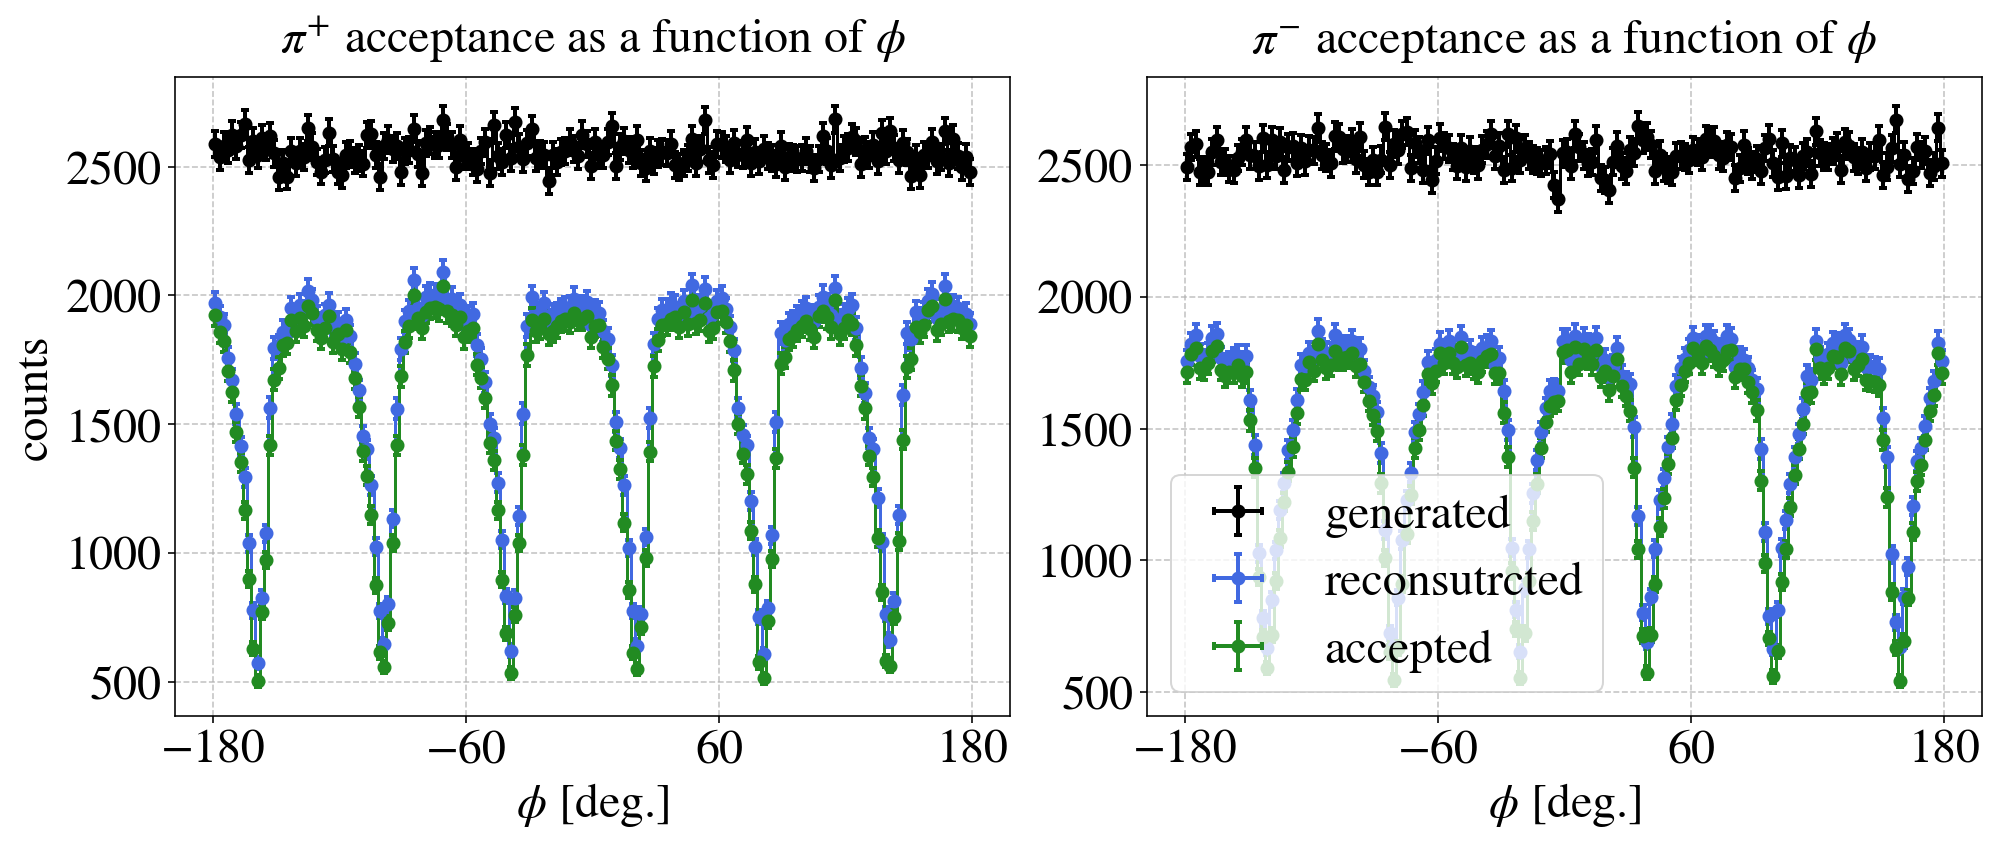

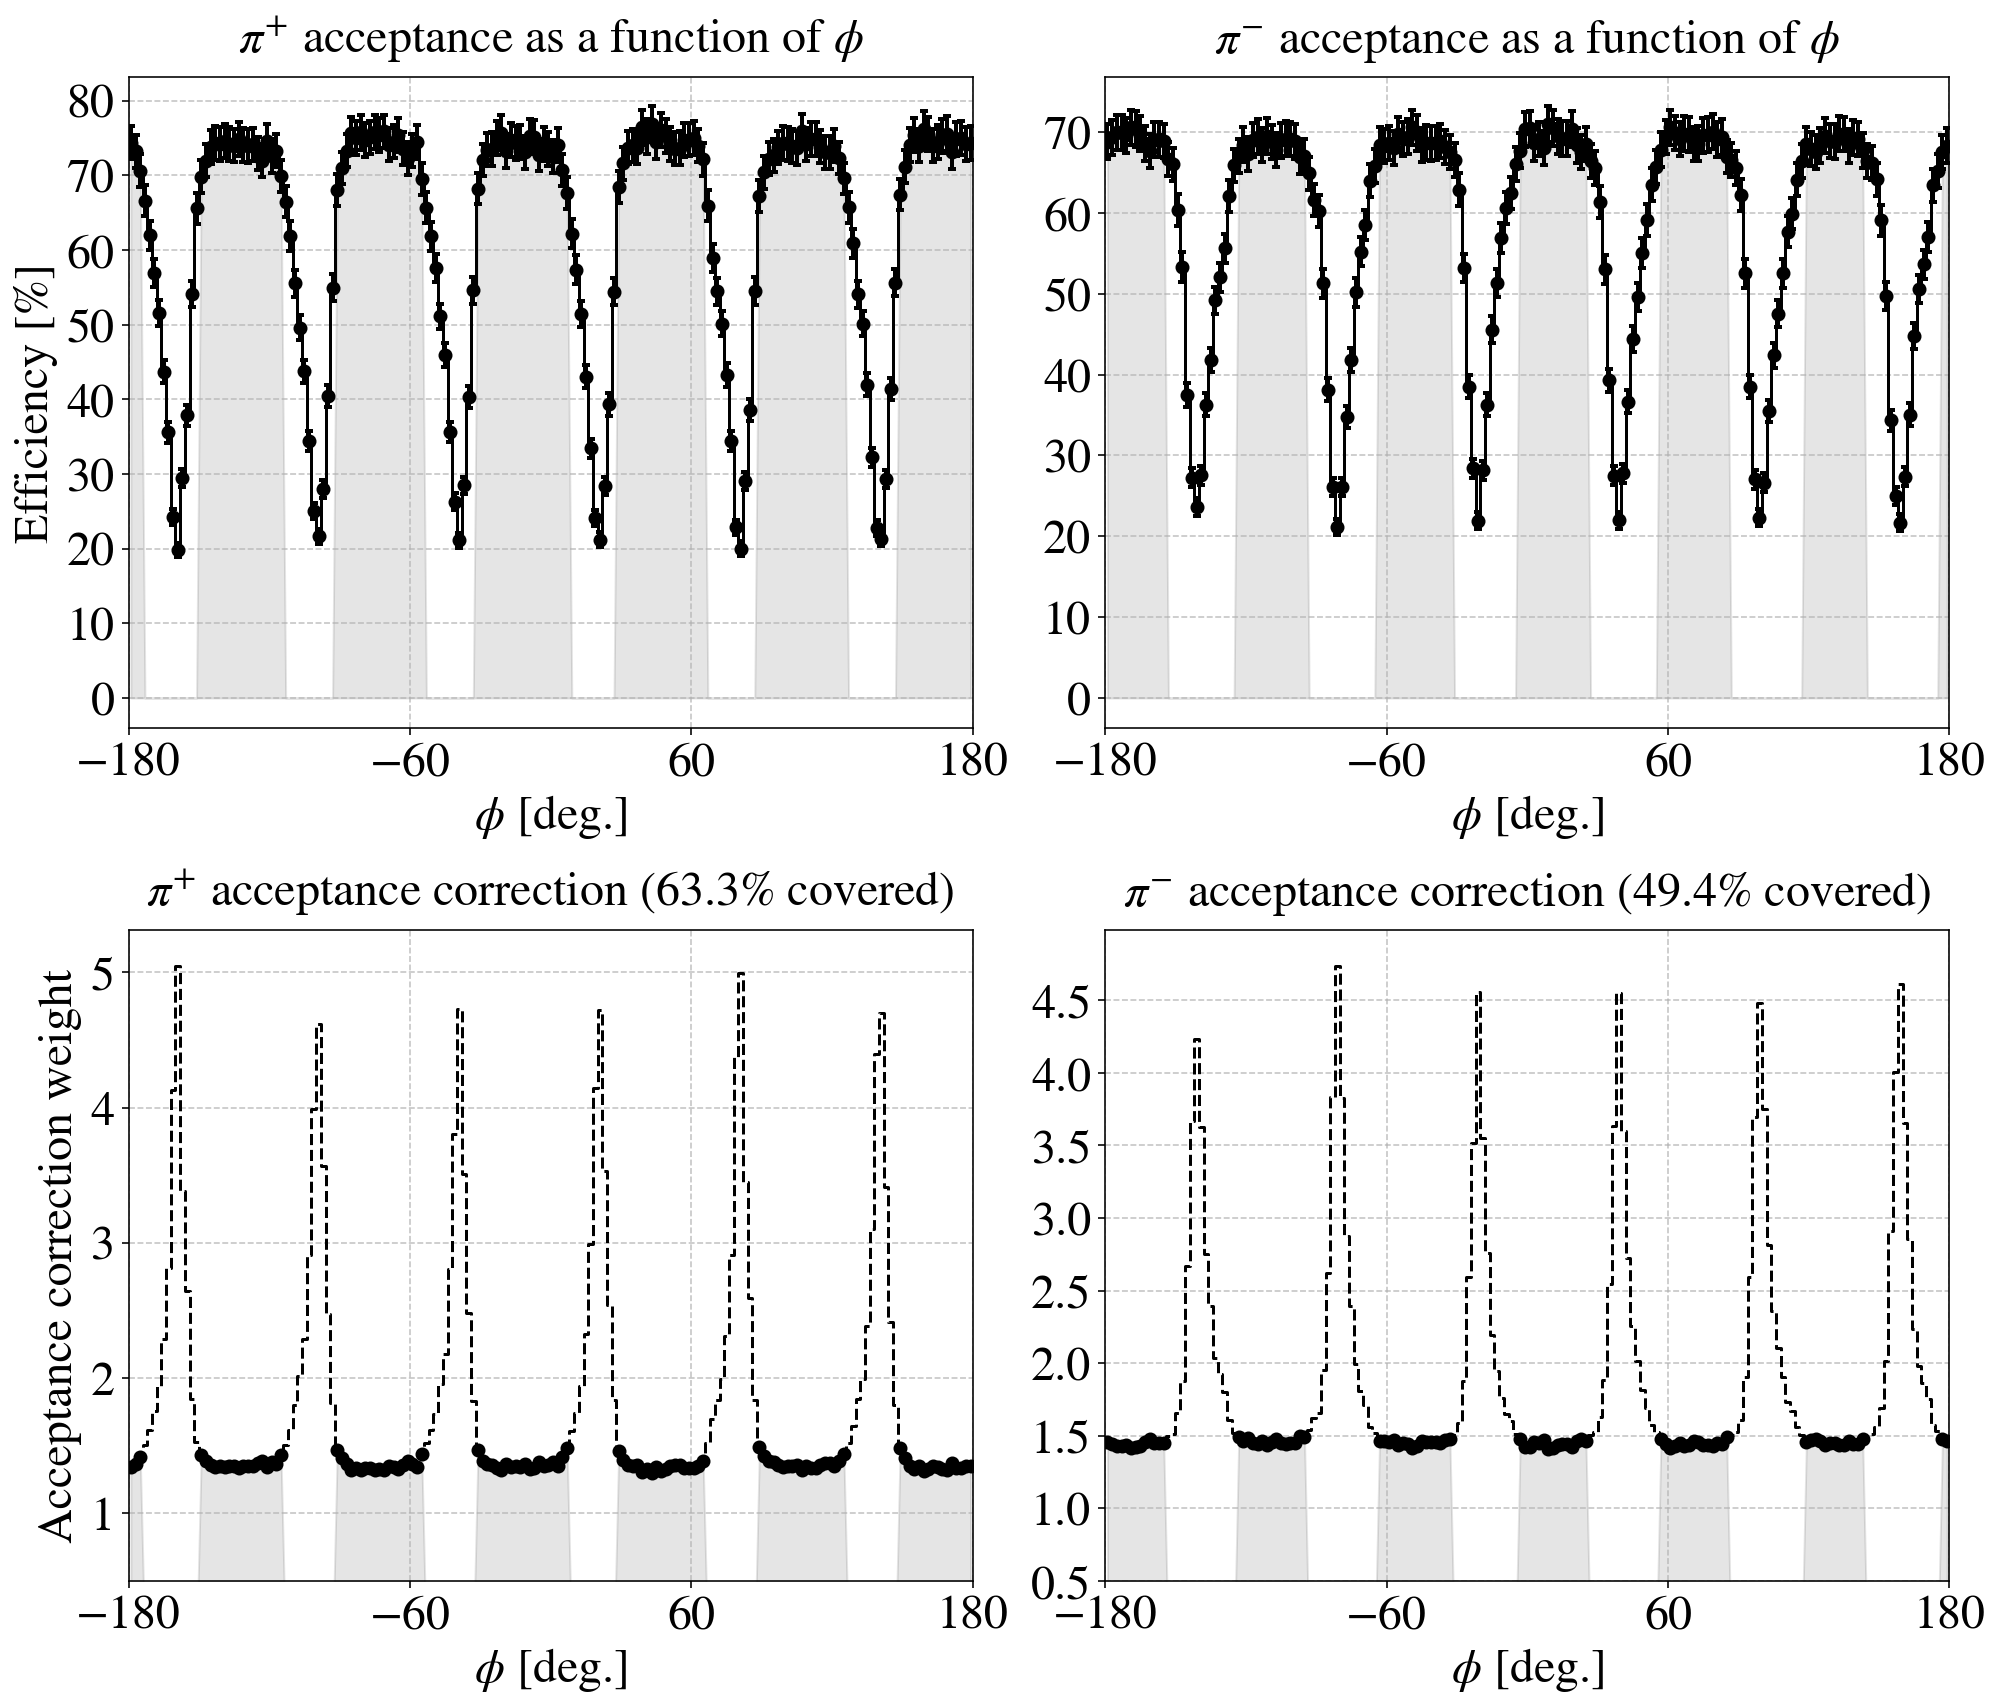

In [102]:
ComputeAcceptanceCorrectionAsFunctionOfPhi()

# (3) Check the acceptance correction
To check the correction, plot the data as a function of $\phi$, where each event is weighted by its own correction factor

### (3.1) Plot $\phi$ distribution of MC before and after acceptance correction

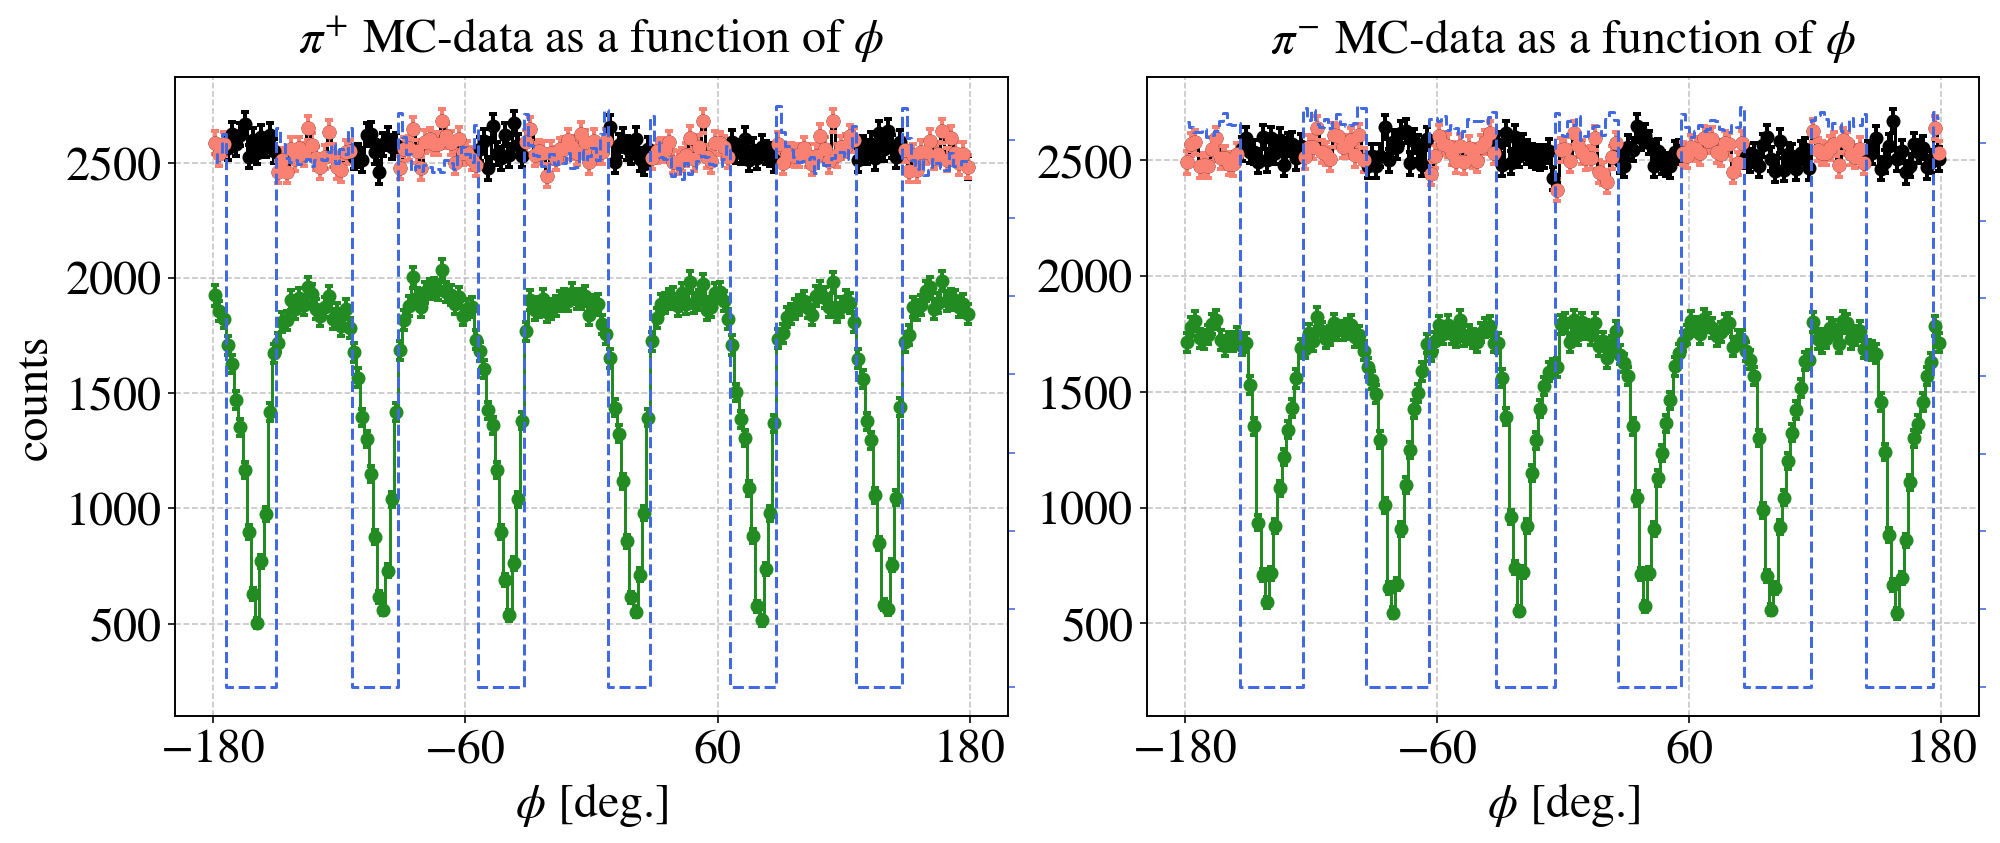

In [108]:
var_gen      = 'pi_Phi_g'
label        = '$\phi$'
units        = '[deg.]'
scale_factor = r2d
do_correct_directly = False

fig = plt.figure(figsize=(14,6));
for eepi_GEMC,pi_charge_name,pi_charge_label,pi_idx in zip([eepips_GEMC,eepims_GEMC],pi_charge_names,pi_labels,
                                                           range(2)):
    pi_ch   = pi_charge_name
    
    df_gen  = eepi_GEMC;
    x_gen   = df_gen[var_gen]
    phi_gen = x_gen*scale_factor
    
    df_acc     = eepi_GEMC[eepi_GEMC.pi_passed_cuts==1];        
    x_acc      = df_acc[var_gen]    
    phi_acc    = x_acc*scale_factor
    w_acc_corr = [Compute_acceptance_correction_weight( pi_ch, phi ) for phi in phi_acc]

    ax = fig.add_subplot(1,2,pi_idx+1)
    plot_step_hist( phi_gen, phi_bins, weights=None,       color='k',           label='generated')
    plot_step_hist( phi_acc, phi_bins, weights=None,       color='forestgreen', label='accepted')            
    plot_step_hist( phi_acc, phi_bins, weights=w_acc_corr, color='salmon',      label='corrected', do_plot_step=False)

    if do_correct_directly:
        plt.step( phi_centers, h[pi_ch+'acc']*AccCorrec[pi_ch], color='red', where='mid', label='corrected directly', linewidth=3 )
        
    set_axes(ax,label + ' ' + units,'counts' if pi_idx==0 else '',
                do_add_legend=False,
                 title='$'+pi_charge_label+'$ MC-data as a function of '+label,
             fontsize=24, 
             do_add_grid=True,xticks=xticks, ylim=(100,np.max(ax.get_ylim())))
    # if pi_idx==1: ax.legend(bbox_to_anchor=(1.5,1.5),loc='right',fontsize=22)
    
    
    # acceptance correction weight
    ax2 = ax.twinx()
    # ax2.step ( phi_centers, AccCorrec[pi_ch], '--', color='royalblue', where='mid', label=None )
    ax2.step ( phi_centers, AccCorrecTightFiducial[pi_ch], '--', color='royalblue', where='mid', label=None )

    set_axes(ax2,label + ' ' + units,'Acceptance correction' if pi_idx==2 else '',ticks_color='royalblue',
             fontsize=20, 
             remove_ticks_y=False if pi_idx==2 else True)
    

plt.tight_layout();

In [109]:
# roi_indices = np.where((phi_acc>126) & (phi_acc<160))
# fig=plt.figure(figsize=(14,4))
# ax=fig.add_subplot(1,2,1)
# plt.scatter(np.array(phi_acc)[roi_indices],np.array(w_acc_corr)[roi_indices]);
# ax=fig.add_subplot(1,2,2)
# plt.scatter(np.array(phi_acc)[roi_indices],np.array(Find_phi_bin(phi_acc))[roi_indices]);
# plt.tight_layout()

# for indx in np.unique((Find_phi_bin(phi_acc))[roi_indices]):
#     print(AccCorrec[pi_charge_name][indx])

[  0   5  10  30  90 150 175 178]
[1.45390898 1.41671437 1.44871795 1.48604651 1.41903172 1.47337963
 0.         1.48011204]


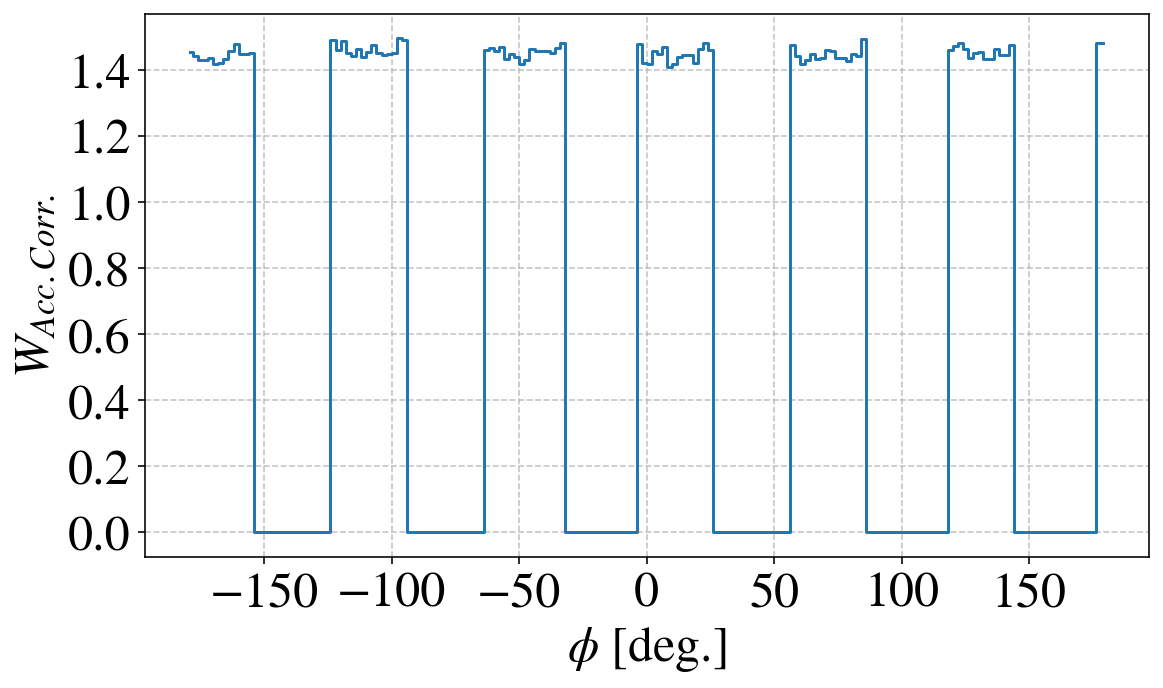

In [111]:
bin_indices = Find_phi_bin( [-180,-170,-160,-120,0,120,170,181] )
print(bin_indices)
print(AccCorrecTightFiducial[pi_ch][bin_indices])
# np.max(df_acc[var_gen][0:10]*r2d)
# print(phi_centers[Nbins-1])

W_acc_corr = Compute_acceptance_correction_weight( pi_charge_name, phi_centers )
fig,ax=plt.subplots(figsize=(9,5))
plt.step( phi_centers, W_acc_corr, where='mid' );
set_axes(ax,'$\phi$ [deg.]','$W_{Acc. Corr.}$',do_add_grid=True);

### (3.2) Correct $\pi^{\pm}$ data and plot $\phi$ distribution

#### Compute correction for a single event as example

In [338]:
event = e_e_pi[pi_charge_name].iloc[1]
phi = float(event.pi_Phi)*r2d
print('event phi: ',phi ,'deg.')

phi_bin = Find_phi_bin( phi )
print('phi bin: ',phi_bin)

W_acc_corr = Compute_acceptance_correction_weight( pi_charge_name, phi )
print('W_acc_corr:',W_acc_corr)

event phi:  -12.10946300008995 deg.
phi bin:  41
W_acc_corr: 1.3440126050420167


#### Compute correction for all events

In [112]:
for pi_charge_name,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    # print(pi_charge_name)
    df = e_e_pi_after_p_theta_cut[pi_charge_name];
    phis = np.array( df.pi_Phi )*r2d
    acc_corr_weights = [ Compute_acceptance_correction_weight( pi_charge_name, phi ) for phi in phis ]
    df = df.assign(Weight_AccCorrec = acc_corr_weights)
    e_e_pi_after_p_theta_cut[pi_charge_name] = df
    # display(df)
    print('Computing acceptance correction weights for ',pi_charge_name,'.')
#}
print('Done computing acceptance correction weights.')

Computing acceptance correction weights for  piplus .
Computing acceptance correction weights for  piminus .
Done computing acceptance correction weights.


#### Plot $\phi$ distribution with and without application of the acceptance correction weights
Do not correct for fraction of $\phi$ area covered by acceptance distribution, as we do this globaly on the number of detected events

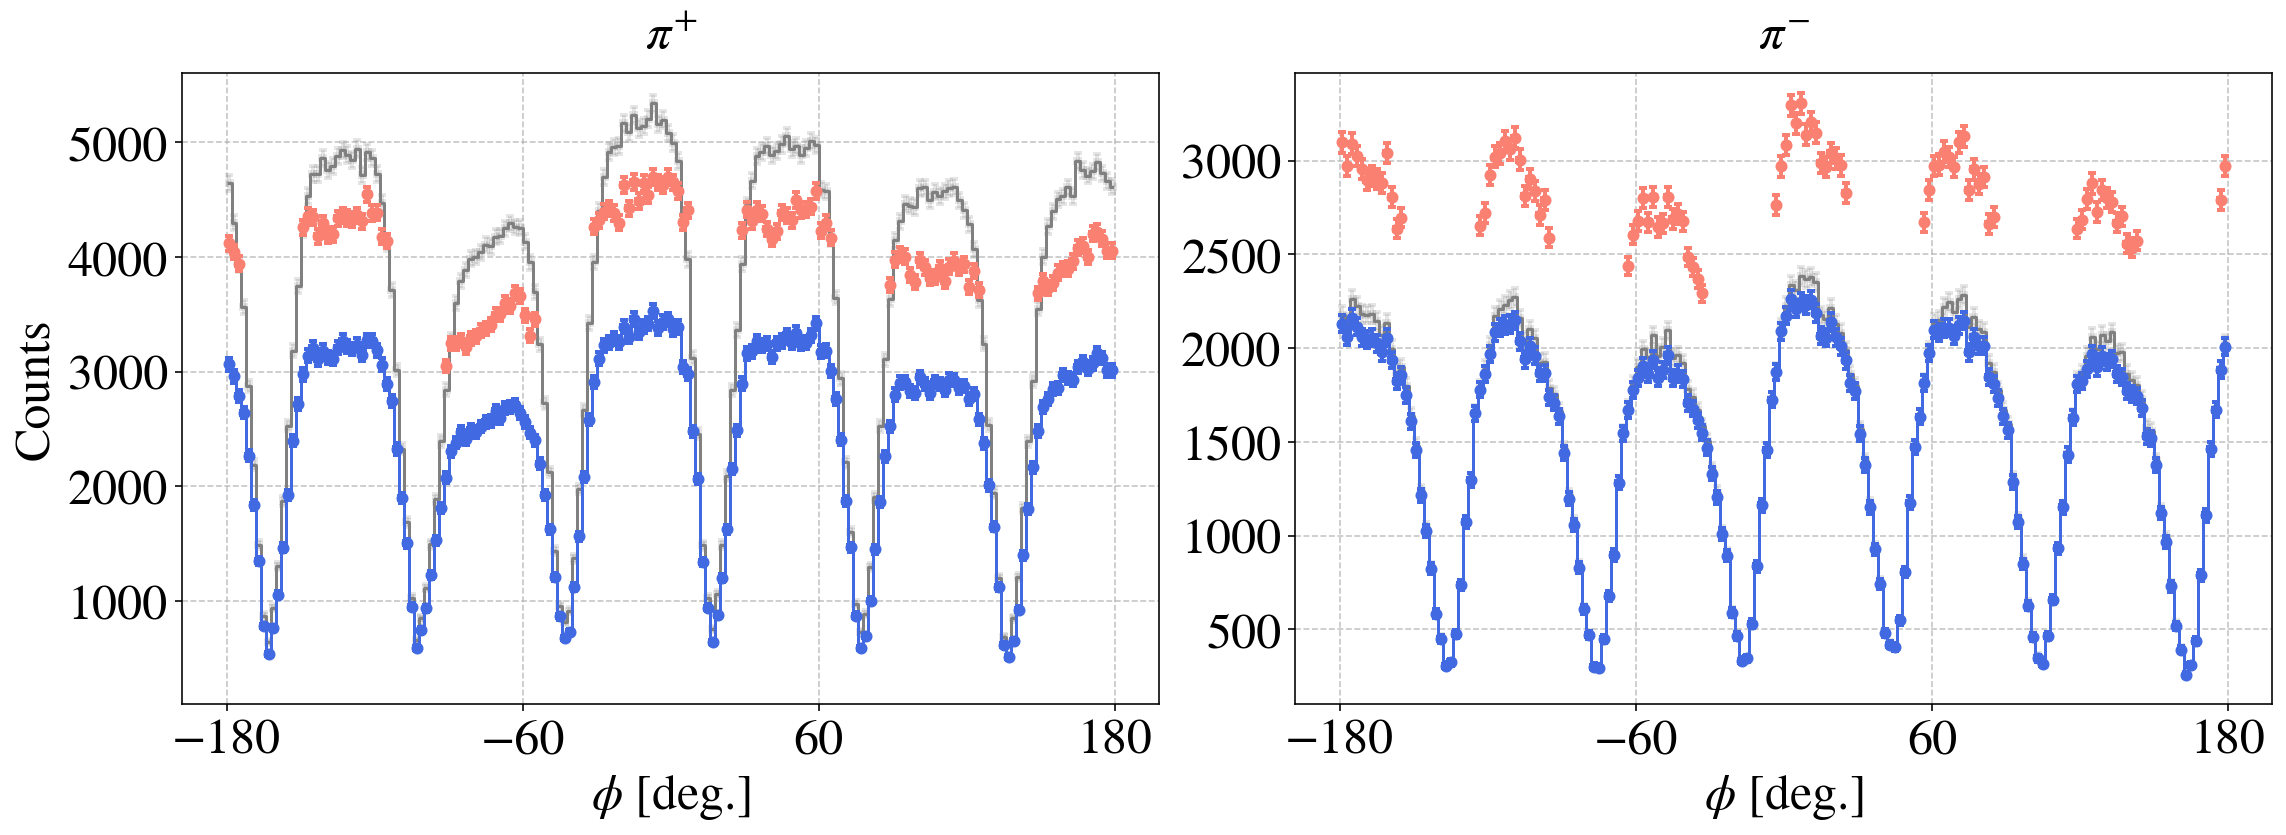

In [126]:
do_plot_acceptance_weight = False
do_plot_direct_correction_in_phi = False
fig = plt.figure(figsize=(16,6));

for pi_charge_name,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    pi_ch = pi_charge_name
    ax = fig.add_subplot(1,2,pi_idx)

    # first plot: before p-theta acceptance matching cut
    df  = e_e_pi[pi_charge_name];
    phi = np.array(df.pi_Phi)*r2d
    weights = None
    color = 'grey'
    label = 'Before acceptance matching'
    _,h[label],_,_ = plot_step_hist( x_arr=phi,  bins=phi_bins , label=label,  color=color, weights=weights, markersize=1, alpha=0.2)

    # second plot: after acceptance matching cut, without acceptance correction
    df  = e_e_pi_after_p_theta_cut[pi_charge_name];
    phi = np.array(df.pi_Phi)*r2d
    weights = None
    color = 'royalblue'
    label = 'After acceptance matching'
    _,h[label],_,_ = plot_step_hist( x_arr=phi,  bins=phi_bins , label=label,  color=color, weights=weights )

    # third plot:  after acceptance matching cut, with acceptance correction
    df  = e_e_pi_after_p_theta_cut[pi_charge_name];
    phi = np.array(df.pi_Phi)*r2d
    weights = np.array(df.Weight_AccCorrec)
    color = 'salmon'
    label = 'With acceptance correction'
    _,h[label],_,_ = plot_step_hist( x_arr=phi,  bins=phi_bins , label=label,  color=color, weights=weights, do_plot_step=False )

    
    # comparison plot: directly multiply the histogram by the acceptance correction
    if do_plot_direct_correction_in_phi:
        plt.step ( phi_centers, h['After acceptance matching']*AccCorrec[pi_ch], '--', color='red', where='mid', label=None )
    
    if do_plot_acceptance_weight:
        ax2 = ax.twinx()
        ax2.step ( phi_centers, AccCorrecTightFiducial[pi_ch], '--', color='forestgreen', where='mid', label=None )
        ax2.set_ylabel('Acceptance correction', color = 'forestgreen', fontsize=18)


    set_axes(ax, '$\phi$ [deg.]', 'Counts' if pi_idx==1 else '',
             title='$'+pi_label+'$', do_add_grid=True,
             ylim=(100,1.05*np.max([np.max(h['Before acceptance matching']),np.max(h['With acceptance correction'])])),
             do_add_legend=False,xticks=xticks)
#}

plt.tight_layout()

# arXiv

In [330]:
# var_gen      = 'pi_Phi_g'
# label        = '$\phi$'
# units        = '[deg.]'
# scale_factor = r2d

# fig = plt.figure(figsize=(14,6));
# for eepi_GEMC,pi_charge_name,pi_charge_label,pi_idx in zip([eepips_GEMC,eepims_GEMC],pi_charge_names,pi_labels,range(2)):
#     pi_ch = pi_charge_name
#     df_gen = eepi_GEMC;
#     df_rec = eepi_GEMC[eepi_GEMC.pi_reconstructed==1];
#     df_acc = eepi_GEMC[eepi_GEMC.pi_passed_cuts  ==1];    
#     x_gen = df_gen[var_gen]
#     x_rec = df_rec[var_gen]    
#     x_acc = df_acc[var_gen]    


#     ax = fig.add_subplot(1,2,pi_idx+1)
#     x,h[pi_ch+'gen'],x_err,h_err[pi_ch+'gen'] = plot_step_hist( x_gen*scale_factor, phi_bins, color='k',           label='generated')
#     x,h[pi_ch+'rec'],x_err,h_err[pi_ch+'rec'] = plot_step_hist( x_rec*scale_factor, phi_bins, color='royalblue',   label='reconsutrcted')
#     x,h[pi_ch+'acc'],x_err,h_err[pi_ch+'acc'] = plot_step_hist( x_acc*scale_factor, phi_bins, color='forestgreen', label='accepted')            

#     # ax.set_yscale('log')
#     set_axes(ax,label + ' ' + units,'counts' if pi_idx==0 else '',
#                 do_add_legend=True if pi_idx==1 else False,
#                  title='$'+pi_charge_label+'$ acceptance as a function of '+label, fontsize=24, do_add_grid=True,xticks=xticks)
    
# plt.tight_layout();

In [331]:
# for eepi_GEMC,pi_charge_name,pi_charge_label,pi_idx in zip([eepips_GEMC,eepims_GEMC],pi_charge_names,pi_labels,range(2)):
#     pi_ch = pi_charge_name
#     h[pi_ch+'eff'] = h[pi_ch+'acc']/h[pi_ch+'gen']
#     h_err[pi_ch+'eff'] = h[pi_ch+'eff']*np.sqrt( np.square(h_err[pi_ch+'acc']/h[pi_ch+'acc']) + np.square(h_err[pi_ch+'gen']/h[pi_ch+'gen'])  )


#     AccCorrec[pi_ch]     = 1./h[pi_ch+'eff']
#     AccCorrec_err[pi_ch] = h_err[pi_ch+'eff']/np.square( h[pi_ch+'eff'] )

In [332]:
# color = 'k'
# capsize=2
# capthick=2
# marker='o'
# linewidth=2
    
# fig = plt.figure(figsize=(14,12));
# for eepi_GEMC,pi_charge_name,pi_charge_label,pi_idx in zip([eepips_GEMC,eepims_GEMC],pi_charge_names,pi_labels,range(2)):
#     pi_ch = pi_charge_name
#     ax = fig.add_subplot(2,2,pi_idx+1)
#     plt.step ( x, h[pi_ch+'eff']*100., color=color, where='mid', label=None )
#     plt.errorbar ( x=x, xerr=x_err, y=h[pi_ch+'eff']*100., yerr=h_err[pi_ch+'eff']*100.,
#                   color=color, marker='o', linestyle='None',label=label,
#                   capsize=capsize, capthick=capthick, linewidth=linewidth )
    
#     set_axes(ax,label + ' ' + units,'Efficiency [%]' if pi_idx==0 else '',
#         do_add_legend=False,
#         title='$'+pi_charge_label+'$ acceptance as a function of '+label, fontsize=24, do_add_grid=True,xticks=xticks)

# # plt.tight_layout();



# # fig = plt.figure(figsize=(14,6));
# for eepi_GEMC,pi_charge_name,pi_charge_label,pi_idx in zip([eepips_GEMC,eepims_GEMC],pi_charge_names,pi_labels,range(2)):
#     pi_ch = pi_charge_name
#     ax = fig.add_subplot(2,2,pi_idx+3)
#     plt.step ( x, AccCorrec[pi_ch], color=color, where='mid', label=None )
#     plt.errorbar ( x=x, xerr=x_err, y=AccCorrec[pi_ch], yerr=AccCorrec_err[pi_ch],
#                   color=color, marker='o', linestyle='None',label=label,
#                   capsize=capsize, capthick=capthick, linewidth=linewidth )
    
#     set_axes(ax,label + ' ' + units,'Acceptance correction weight' if pi_idx==0 else '',
#         do_add_legend=False,
#         title='$'+pi_charge_label+'$ acceptance correction as a function of '+label, fontsize=24, do_add_grid=True,xticks=xticks)
    
# plt.tight_layout();

In [363]:
h['Before acceptance matching'][3:6]

array([2361, 1585, 3178])

In [364]:
h['With acceptance correction'][3:6]

array([7145.53664921, 5280.3372549 , 5472.87714166])

In [369]:
AccCorrec['piplus'][3:6]

array([2.09964272, 3.35471204, 4.04313725])

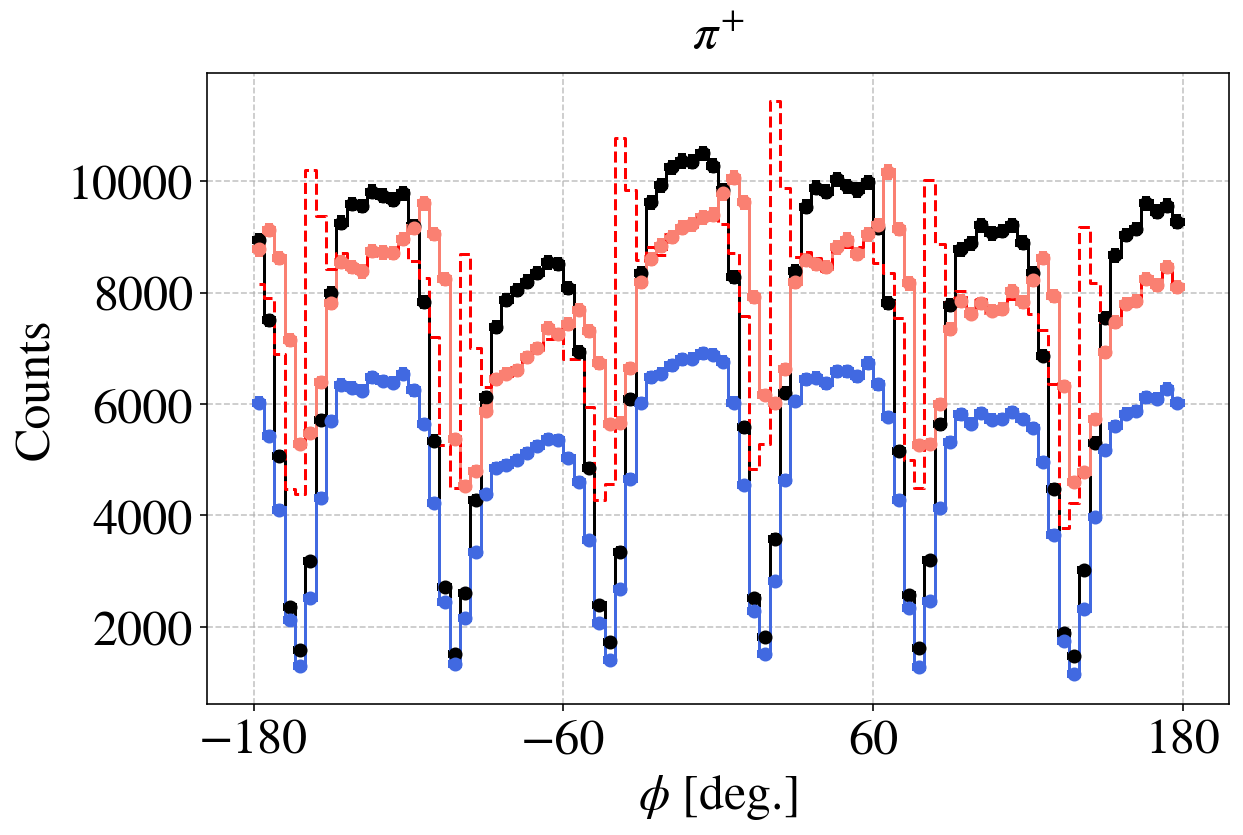

In [358]:
do_plot_acceptance_weight = False
do_plot_direct_correction_in_phi = True
fig = plt.figure(figsize=(16,6));

for pi_charge_name,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1]):#{
    pi_ch = pi_charge_name
    ax = fig.add_subplot(1,2,pi_idx)

    # first plot: before p-theta acceptance matching cut
    df  = e_e_pi[pi_charge_name];
    phi = np.array(df.pi_Phi)*r2d
    weights = None
    color = 'black'
    label = 'Before acceptance matching'
    _,h[label],_,_ = plot_step_hist( x_arr=phi,  bins=phi_bins , label=label,  color=color, weights=weights )

    # second plot: after acceptance matching cut, without acceptance correction
    df  = e_e_pi_after_p_theta_cut[pi_charge_name];
    phi = np.array(df.pi_Phi)*r2d
    weights = None
    color = 'royalblue'
    label = 'After acceptance matching'
    _,h[label],_,_ = plot_step_hist( x_arr=phi,  bins=phi_bins , label=label,  color=color, weights=weights )

    # third plot:  after acceptance matching cut, with acceptance correction
    df  = e_e_pi_after_p_theta_cut[pi_charge_name];
    phi = np.array(df.pi_Phi)*r2d
    weights = np.array(df.Weight_AccCorrec)
    color = 'salmon'
    label = 'With acceptance correction'
    _,h[label],_,_ = plot_step_hist( x_arr=phi,  bins=phi_bins , label=label,  color=color, weights=weights )

    
    # comparison plot: directly multiply the histogram by the acceptance correction
    if do_plot_direct_correction_in_phi:
        plt.step ( phi_centers, h['After acceptance matching']*AccCorrec[pi_ch], '--', color='red', where='mid', label=None )
    
    if do_plot_acceptance_weight:
        ax2 = ax.twinx()
        ax2.step ( phi_centers, AccCorrec[pi_ch], '--', color='forestgreen', where='mid', label=None )
        ax2.set_ylabel('Acceptance correction', color = 'forestgreen', fontsize=18)


    set_axes(ax, '$\phi$ [deg.]', 'Counts' if pi_idx==1 else '',
             title='$'+pi_label+'$', do_add_grid=True,
             do_add_legend=False,xticks=xticks)
#}

plt.tight_layout()

In [357]:
for pi_charge_name,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    # print(pi_charge_name)
    df = e_e_pi_after_p_theta_cut[pi_charge_name];
    phis = np.array( df.pi_Phi )*r2d
    acc_corr_weights = [ Compute_acceptance_correction_weight( pi_charge_name, phi ) for phi in phis ]
    df = df.assign(Weight_AccCorrec = acc_corr_weights)
    e_e_pi_after_p_theta_cut[pi_charge_name] = df
    # display(df)
    print('Computing acceptance correction weights for ',pi_charge_name,'.')
#}
print('Done computing acceptance correction weights.')

Computing acceptance correction weights for  piplus .
Computing acceptance correction weights for  piminus .
Done computing acceptance correction weights.
